# Notebook Purpose
This notebook is created for data preprocessing steps.
The visualizations, feature extractions and dimentionality reduction will be done in here. The models will be executed on the raw data, manipulated data and with less amount of dimentional data for experimental purposes.

## Data Visualization

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

Configuring the system path to prevent import issues

In [2]:
import pandas as pd

df_filename = "diabetes.csv"
dataframe_path = f"./data/{df_filename}"

try:
    df = pd.read_csv(dataframe_path)
    print(df.head(5))
except FileNotFoundError as e:
    print("Error:", e)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Reading dataframe with pandas and seeing the dataframe related informations 

In [3]:
for column in df.columns:
    print(f"{column} ", end="")

print()

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age Outcome 


In [4]:
# Making dataframe column names lower case
df.columns = [column.lower() for column in df.columns]

print(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


In [9]:
# Initializing the preprocessor
from src.preprocess import PreProcessor

processor = PreProcessor(df=df)


/home/ali-ubuntu/Desktop/data_mining/diabetes/logs/preprocess.log


In [18]:
[categoric, numeric, cardinal] = processor.seperate_columns(return_cols=True)

2025-01-25 15:21:15,566 - /home/ali-ubuntu/Desktop/data_mining/diabetes/src/preprocess.py[line:69] - INFO: Seperation process of the columns are started
2025-01-25 15:21:15,566 - /home/ali-ubuntu/Desktop/data_mining/diabetes/src/preprocess.py[line:69] - INFO: Seperation process of the columns are started
2025-01-25 15:21:15,566 - /home/ali-ubuntu/Desktop/data_mining/diabetes/src/preprocess.py[line:69] - INFO: Seperation process of the columns are started
2025-01-25 15:21:15,573 - /home/ali-ubuntu/Desktop/data_mining/diabetes/src/preprocess.py[line:87] - DEBUG: ['outcome']
2025-01-25 15:21:15,573 - /home/ali-ubuntu/Desktop/data_mining/diabetes/src/preprocess.py[line:87] - DEBUG: ['outcome']
2025-01-25 15:21:15,573 - /home/ali-ubuntu/Desktop/data_mining/diabetes/src/preprocess.py[line:87] - DEBUG: ['outcome']
2025-01-25 15:21:15,575 - /home/ali-ubuntu/Desktop/data_mining/diabetes/src/preprocess.py[line:88] - DEBUG: ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', '

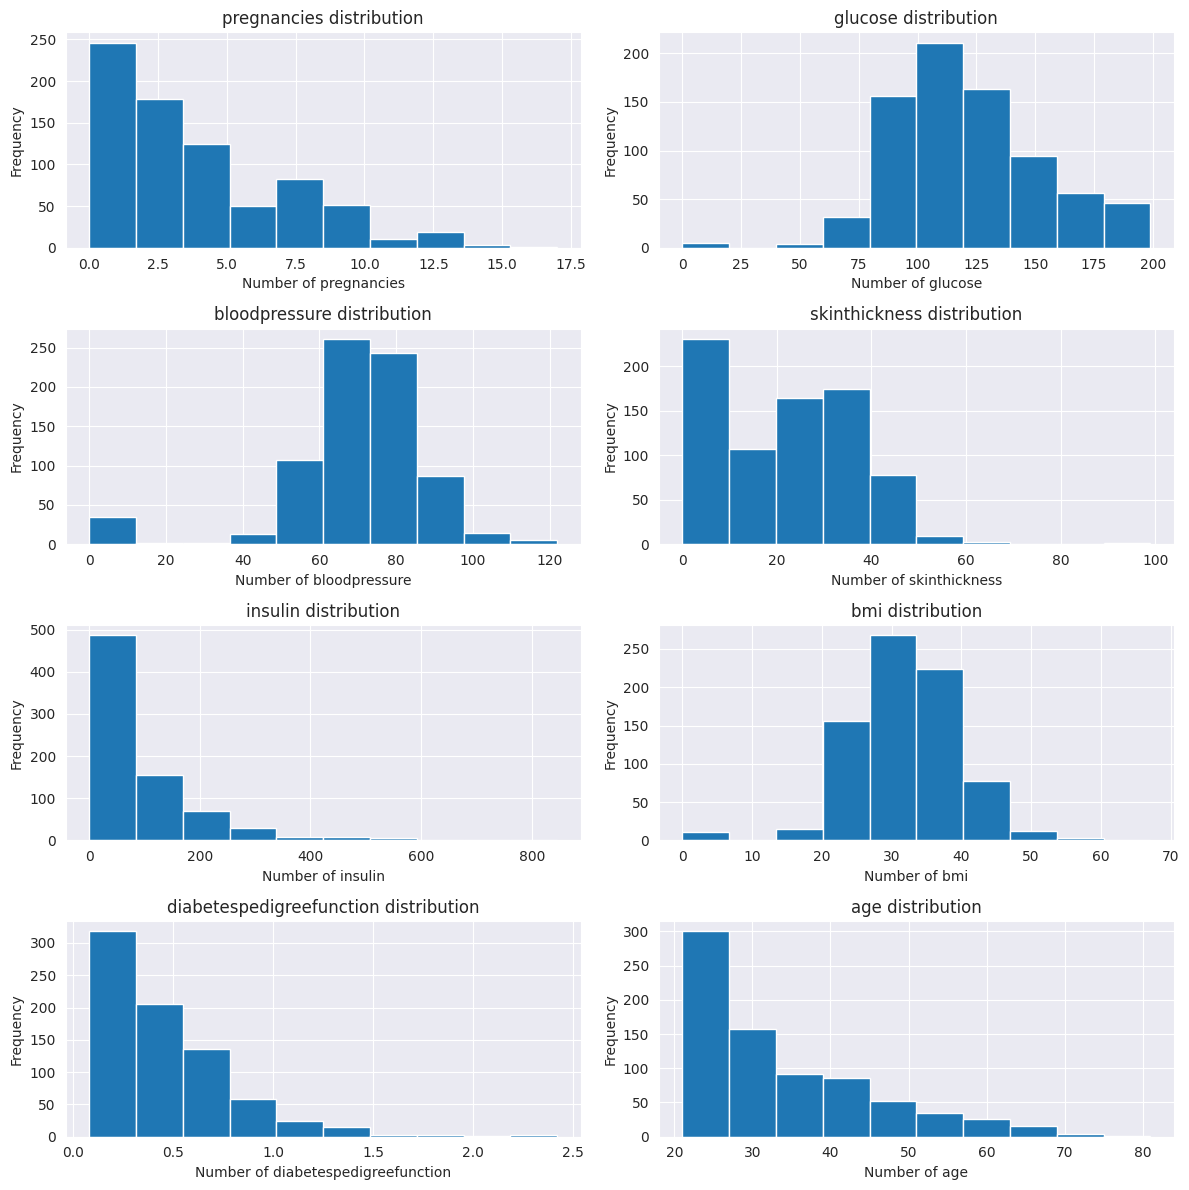

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
for i in range(len(numeric)):
    plt.subplot(4, 2, i+1)
    df[numeric[i]].hist(bins=10)
    plt.title(f"{numeric[i]} distribution")
    plt.xlabel(f"Number of {numeric[i]}")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(len(numeric)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(data=df, x=numeric[i])
    plt.title(f"{numeric[i]} KDE plot")
    plt.xlabel("Distribution")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()  
    

In [ ]:
# To visualize the combinations built-in tool is imported
from itertools import combinations

# combinations are constructed
numeric_combinations = list(combinations(numeric, 2))

combination_amount = len(numeric_combinations)

plt.figure(figsize=(15, combination_amount * 2))

for idx,(x, y) in enumerate(numeric_combinations, 1):
    plt.subplot((combination_amount // 3) + 1, 3, idx)
    sns.scatterplot(data=df, x=x, y=y, hue="outcome")
    plt.title(f"{x} and {y} scatter")
    plt.xlabel(x)
    plt.ylabel(y)
    
plt.tight_layout()
plt.show()

# Pregnancies Attribute
According to the scatterplot of pregnancies attribute, it is discrete variable, thus it is a categorical attribute rather than a numeric attribute.

In [ ]:

plt.figure(figsize=(16, 12))
plot_index = 1
for column in numeric:
    plt.subplot(4, 2, plot_index)
    if column != "pregnancies":
        sns.scatterplot(x="pregnancies",
                        y=column,
                        data=df,
                        hue="outcome")
        plt.xlabel("pregnancies")
        plt.ylabel(column)
        plt.title(f"Scatter plot for {column}")
        plot_index += 1

plt.tight_layout()
plt.show()
        

In [ ]:
categoric.append("pregnancies")
numeric.remove("pregnancies")

print(categoric)
print(numeric)
print(cardinal)